In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Import the original images and cut them to size

Tower   has shape (576, 1024, 3) and dtype uint8
Dog     has shape (602, 1200, 3) and dtype uint8
New dog has shape (576, 1024, 3) and dtype uint8


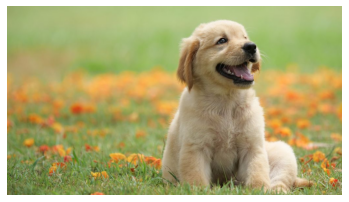

In [4]:
tower = plt.imread('original_images/tower.jpg')

height, width, channels = tower.shape
imagetype = tower.dtype
print(f"Tower   has shape {tower.shape} and dtype {tower.dtype}")

dog = plt.imread('original_images/dog.jpg')
print(f"Dog     has shape {dog.shape} and dtype {dog.dtype}")

dog = dog[0:height, 0:width]
print(f"New dog has shape {dog.shape} and dtype {dog.dtype}")

plt.imshow(dog)
plt.axis('off');

assert dog.shape == tower.shape
assert dog.dtype == tower.dtype

## Transform into 8-bit color space

Bin edges:    [  0  51 102 153 204 255]
Image values: [  0  51 102 153 204]
Hidden dog has dtype uint8


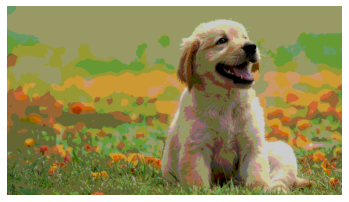

In [9]:
hidden_dog = dog.copy()
bits = 5
edges = np.linspace(start=0, stop=255, num=bits+1).astype(imagetype)
print(f"Bin edges:    {edges}")

for i in range(bits):
    low, high = edges[i], edges[i+1]
    in_interval = np.logical_and(low < dog, dog <= high)
    hidden_dog[in_interval] = i

step = (high - low)
test_dog = hidden_dog*step

plt.imshow(test_dog)
plt.axis('off')

print(f"Image values: {np.unique(test_dog)}")
print(f"Hidden dog has dtype {hidden_dog.dtype}")

plt.imsave('altered_images/dog.png', hidden_dog)

## Now use the reciprocal of the tower image

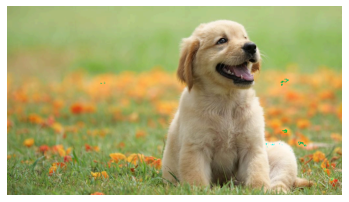

In [15]:
tower_remainder = tower % bits
tower_quotient = np.floor(tower / bits)

# new_tower = (tower_quotient * bits + tower_remainder).astype(imagetype) # Get the original image

new_tower = (tower_quotient * bits + hidden_dog).astype(imagetype) # Now contains remainder of dog image

plt.imshow(new_tower)
plt.axis('off');
plt.show()


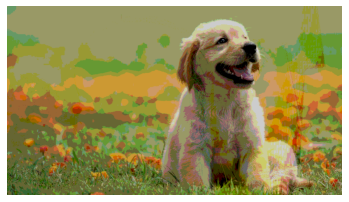

In [11]:
see_dog = (new_tower % bits) * step

plt.imshow(see_dog)
plt.axis('off');

In [12]:
plt.imsave('altered_images/tower.tiff', new_tower)